In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("indiancurrencydetection").project("currency_detection_pant_pocket-0x1sd")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.98, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to currency_detection_pant_pocket-1 in yolov8:: 100%|██████████| 802/802 [00:00<00:00, 5272.54it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/currency_detection_pant_pocket-1/data.yaml epochs=25 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 114MB/s] 
Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/currency_detection_pant_pocket-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

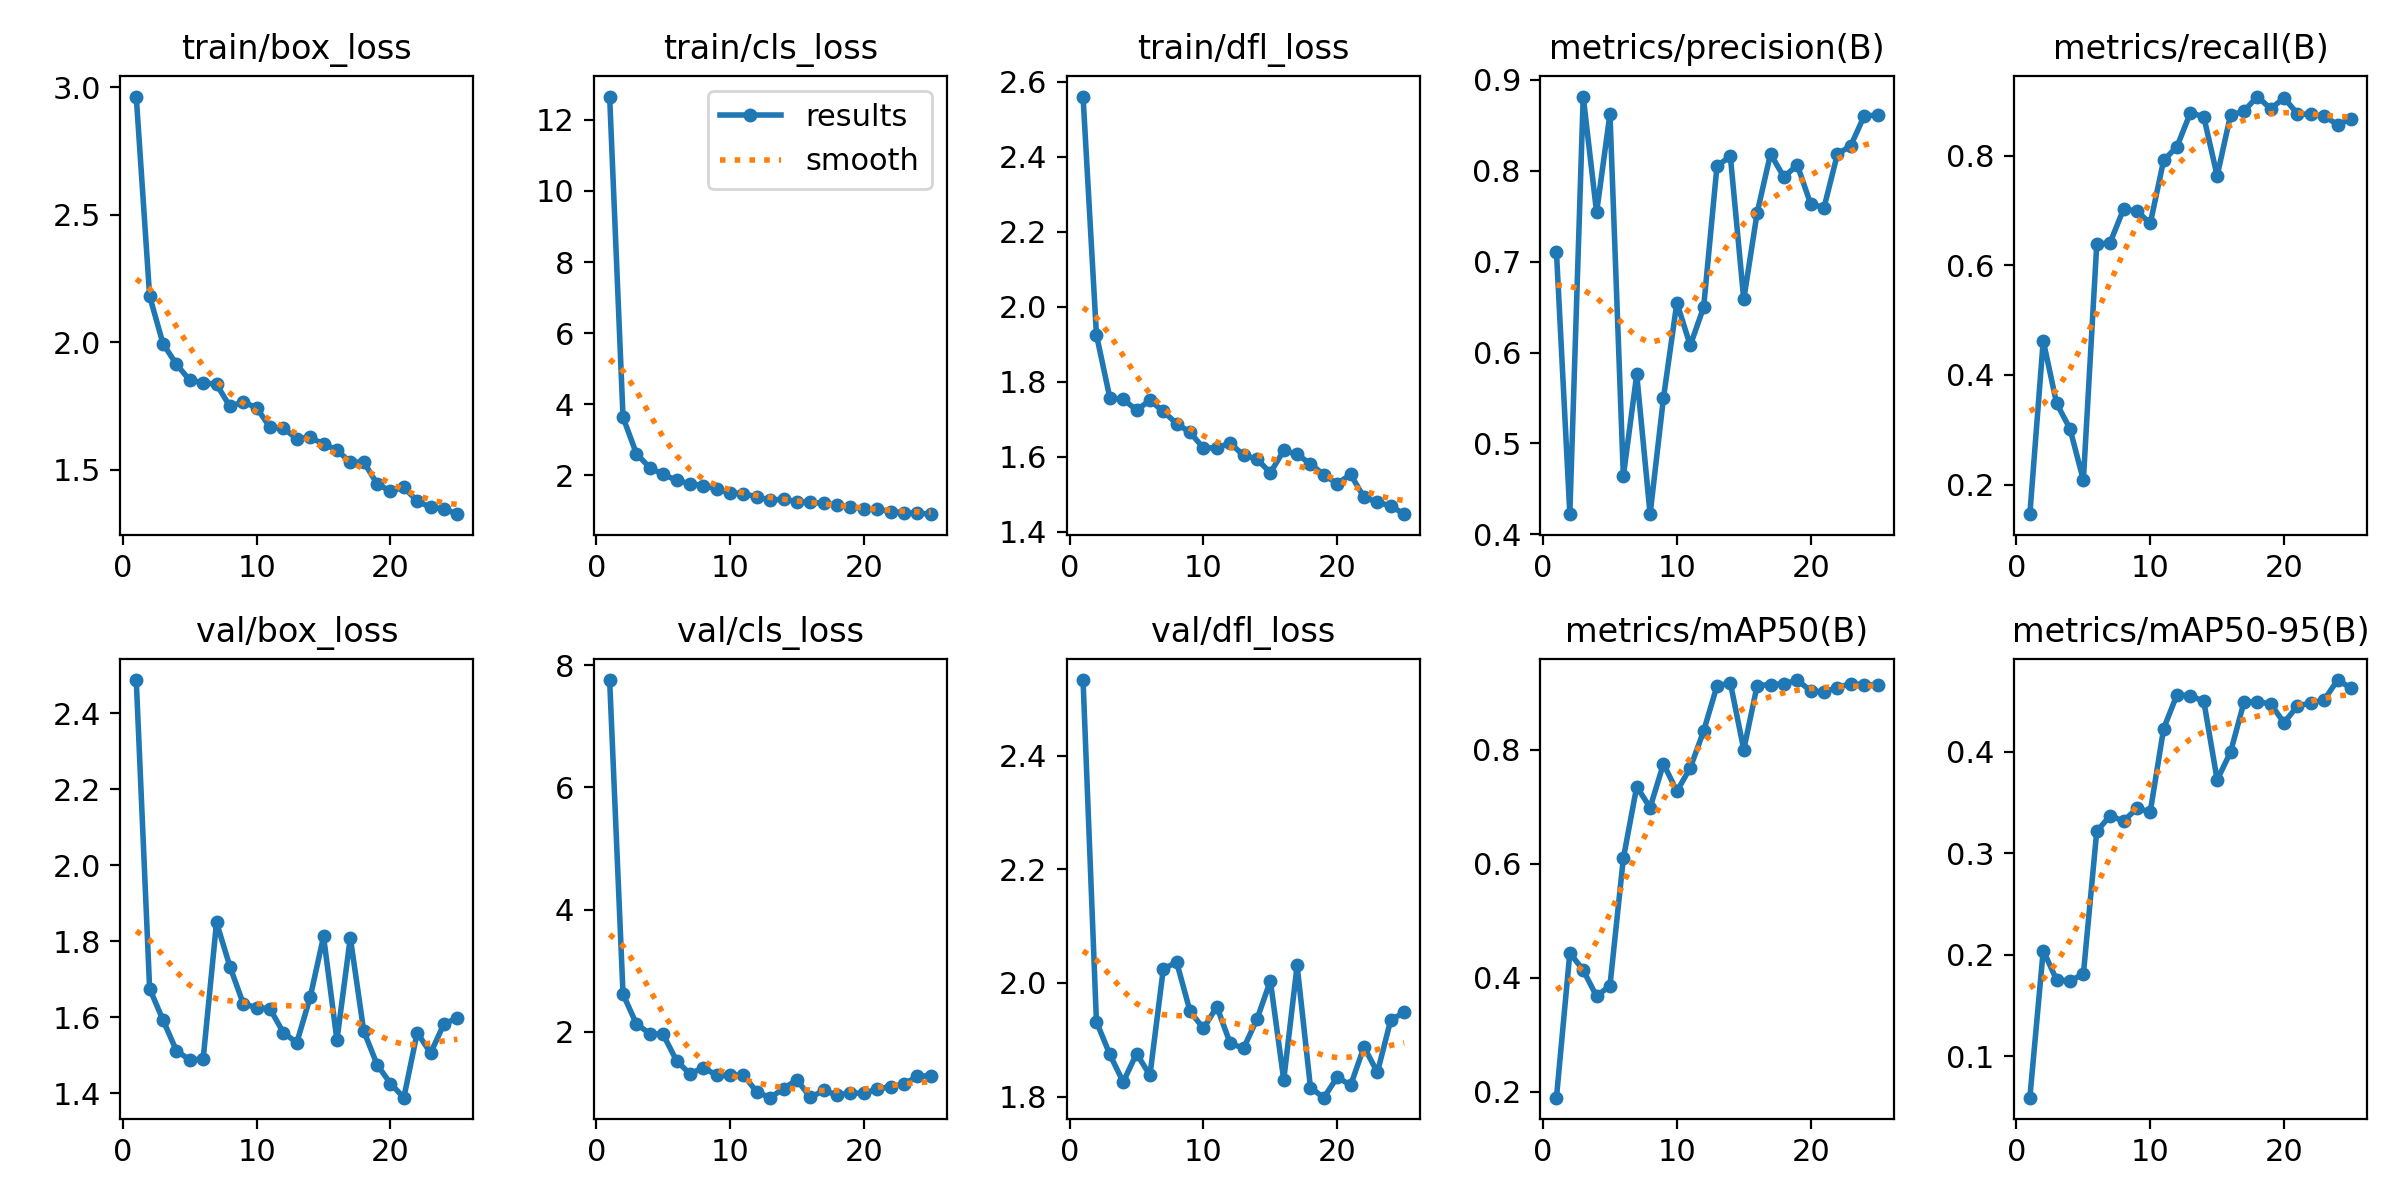

In [ ]:
# VIEW MODEL TRANING CHARTS
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
# VALIDATION
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/currency_detection_pant_pocket-1/data.yaml

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/currency_detection_pant_pocket-1/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.74it/s]
                   all         33         47       0.86      0.857      0.914      0.472
  money_in_pant_pocket         10         10      0.688      0.444      0.588      0.254
 person_1_giving_money         10         10      0.873        0.9      0.916      0.346
person_1_having_money_in_hand          1          1      0.808          1      0.995      0.697
person_1_having_money_in_pant_pocket          3          3          1      0.939      0.995      0.697
person_2_have_money_in_hand          2          2      0.782          1      0.995      0.398
per

In [ ]:
from ultralytics import YOLO
import cv2
import os

# Load the trained YOLO model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Load the image
img = cv2.imread('/content/currency_detection_pant_pocket-1/test/images/pant_pocket_1_mp4-0058_jpg.rf.aa5c8f2760034a156209ecf44712853a.jpg')

# Run inference
results = model(img, conf=0.5, iou=0.4)  # Customize confidence and IoU thresholds if needed

# Ensure the save directory exists
save_dir = '/content/runs/detect'
os.makedirs(save_dir, exist_ok=True)

# Save the detection results
for i, result in enumerate(results):
    result_path = os.path.join(save_dir, f"result_{i}.jpg")
    cv2.imwrite(result_path, result.orig_img)
    print(f"Saved result {i} to {result_path}")



0: 384x640 1 person_2_putting_money_in_pant_pocket, 70.8ms
Speed: 3.7ms preprocess, 70.8ms inference, 721.4ms postprocess per image at shape (1, 3, 384, 640)
Saved result 0 to /content/runs/detect/result_0.jpg


In [ ]:
from ultralytics import YOLO
import cv2
import os

# Load the trained YOLO model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Load the video
video_path = ''
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object to save the output video
save_dir = '/content/runs/detect'
os.makedirs(save_dir, exist_ok=True)
output_path = os.path.join(save_dir, 'output_video.mp4')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for mp4
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference on the frame
    results = model(frame, conf=0.2, iou=0.4)

    # Draw bounding boxes on the frame
    annotated_frame = results[0].plot()

    # Write the frame with bounding boxes to the output video
    out.write(annotated_frame)

# Release resources
cap.release()
out.release()

print(f"Processed video saved at {output_path}")



0: 384x640 1 10_rs_note, 1 person_having_money_in_hand, 1 pocket, 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 10_rs_note, 1 person_having_money_in_hand, 1 pocket, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 10_rs_note, 1 person_having_money_in_hand, 2 pockets, 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 10_rs_note, 1 person_having_money_in_hand, 1 pocket, 10.7ms
Speed: 2.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 10_rs_note, 1 person_having_money_in_hand, 1 pocket, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 10_rs_note, 1 person_having_money_in_hand, 1 pocket, 12.7ms
Speed: 2.1ms preprocess, 12.7ms inference, 1.6ms postprocess per image